In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
import logging.config
logging.config.fileConfig('../logging.ini', disable_existing_loggers=False)

#hack for importing from sibling dirs
import context 

import matplotlib.pyplot as plt
%matplotlib inline

# history-of-poland (depth 10) -> ~5325 nodes
CAT_PATH = '../../wiki-graph/hist_of_poland-10h/history-of-poland-10-cats_links-en-20111201'
DICT_PATH = '../../wiki-graph/hist_of_poland-10h/history-of-poland-10-po_linkach-cats_dict-en-20111201'



In [3]:
from cat2vec.assessment.assessment_saver.local_assessment_saver import LocalAssessmentSaver
from cat2vec.assessment.embeddings_assessor import EmbeddingsAssessor, AssessmentConfig
from cat2vec.embedding.sdne.sdne import SDNE



In [4]:
model = SDNE(embedding_size=100, additional_hidden_layers_shapes=[500])

saver = LocalAssessmentSaver(cvs_path=r'C:\Users\Jan\Desktop\neural-embeddings\tmp\results.csv',
                             dst_path=r'C:\Users\Jan\Desktop\neural-embeddings\tmp\data')

assessor = EmbeddingsAssessor(model=model,
                              assessment_saver=saver,
                              cat_path=CAT_PATH,
                              dict_path=DICT_PATH,
                              root_node='History_of_Poland')



2019-06-14 17:30:59,061 - cat2vec.graph.loader - INFO - Loading graph from matrix' files: ../../wiki-graph/hist_of_poland-10h/history-of-poland-10-cats_links-en-20111201, ../../wiki-graph/hist_of_poland-10h/history-of-poland-10-po_linkach-cats_dict-en-20111201
2019-06-14 17:30:59,229 - cat2vec.graph.loader - INFO - Cleaning graph
2019-06-14 17:30:59,239 - cat2vec.graph.loader - INFO - Loaded graph with 5325 nodes and 7501 edges


In [5]:
assessor.fit(epochs=100,
                 learning_rate=0.000018,  # 0.000024 00000417
                 batch_size=32,
                 regularization=0.1,
                 beta=50,
                 loss1_weight=0.20,
                 loss2_weight=1)

2019-06-14 17:31:02,323 - cat2vec.assessment.embeddings_assessor - INFO - Training 'sdne_v1' without random walks
2019-06-14 17:31:02,325 - cat2vec.embedding.sdne.sdne - INFO - Train config: {'epochs': 100, 'learning_rate': 1.8e-05, 'batch_size': 32, 'regularization': 0.1, 'beta': 50, 'loss1_weight': 0.2, 'loss2_weight': 1, 'additional_layers': [500], 'embeddings size': 100}
2019-06-14 17:31:02,358 - tensorflow - WARNING - From c:\users\jan\desktop\neural-embeddings\venv\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_x (InputLayer)         (1, None, 5325)           0         
_________________________________________________________________
encoder_0-

[3866.628497314453,
 3474.004632263184,
 3041.8948095703126,
 2865.8280712890623,
 2746.2766931152346,
 2655.470750427246,
 2573.5259619140625,
 2508.332992248535,
 2447.0062466430663,
 2370.1236001586913,
 2288.2134982299804,
 2173.8778939819335,
 2055.7791250610353,
 1951.251011352539,
 1873.4668270874024,
 1815.0875909423828,
 1768.522904663086,
 1721.8332580566407,
 1688.5370471191407,
 1654.2703996276855,
 1619.4382794189453,
 1584.8832655334472,
 1559.2576356506347,
 1530.2245808410644,
 1505.7531799316407,
 1480.4438429260254,
 1450.2932499694825,
 1401.4973594665528,
 1372.6164476013184,
 1342.5386535644532,
 1301.4111880493165,
 1257.9461793518067,
 1216.910731048584,
 1186.6078930664062,
 1145.5689906311036,
 1108.131262664795,
 1070.1502690124512,
 1034.7169132995605,
 1000.1139770507813,
 962.2177561950683,
 944.2998345184326,
 916.3126973724366,
 888.1148054504395,
 871.2618646240235,
 845.6310517883301,
 823.7145863342286,
 799.9322574615478,
 782.7344808959961,
 769.0335

In [6]:
metrics = AssessmentConfig() \
        .with_edges_prediction(negative_edges_per_node=5, print_erroneous_edges=False)
assessor.assess_model(save_results=False, config=metrics)


2019-06-14 17:46:56,697 - cat2vec.assessment.embeddings_assessor - INFO - Assessing 'sdne_v1' using metrics: [<Metrics.EDGES_PREDICTION: 2>]
2019-06-14 17:46:58,814 - cat2vec.assessment.metrics.edges_prediction_accuracy - INFO - Edges prediction accuracy (AVERAGE): {"True positive": "735 (0.19594774726739536)", "False negative": "3016 (0.8040522527326046)", "True negative": "13049 (0.9801697588822955)", "False positive": "264 (0.0198302411177045)", "Recall": 0.19594774726739536}
2019-06-14 17:47:01,037 - cat2vec.assessment.metrics.edges_prediction_accuracy - INFO - Edges prediction accuracy (HADAMARD): {"True positive": "3518 (0.9378832311383631)", "False negative": "233 (0.0621167688616369)", "True negative": "12988 (0.9755877713513107)", "False positive": "325 (0.024412228648689253)", "Recall": 0.9378832311383631}


{'EDGES_PREDICTION': {'AVERAGE': {'True positive': '735 (0.19594774726739536)',
   'False negative': '3016 (0.8040522527326046)',
   'True negative': '13049 (0.9801697588822955)',
   'False positive': '264 (0.0198302411177045)',
   'Recall': 0.19594774726739536},
  'HADAMARD': {'True positive': '3518 (0.9378832311383631)',
   'False negative': '233 (0.0621167688616369)',
   'True negative': '12988 (0.9755877713513107)',
   'False positive': '325 (0.024412228648689253)',
   'Recall': 0.9378832311383631}}}

In [7]:
W = model.get_embeddings()


In [8]:
import numpy as np

hist, bin_edges = np.histogram(W, bins=1000)

plt.bar(bin_edges[:-1], hist, width = 1)
plt.savefig('sdne-relu-full-histogram.png')
plt.show() 


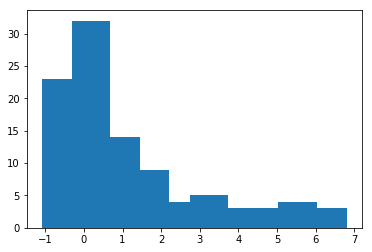

In [9]:
hist_single, bin_edges_single = np.histogram(W[0], bins='auto')

plt.bar(bin_edges_single[:-1], hist_single, width = 1)
plt.savefig('sdne-relu-single-histogram.png')
plt.show() 
